<a href="https://colab.research.google.com/github/TessRedie/Project_image_classification/blob/master/project_image_classification_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project  : Image Classification with the help of Deep Learning Algorithm

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

### Data uploading

### Configuration

In [8]:
EPOCHS                  = 100   # Number of epocks
IMGSIZE                 = 96    # Image_size
BATCH_SIZE              = 32    #  For the processing per plot of image(for ptimizing the gradient descendant)
STOPPING_PATIENCE       = 10    # Callback for stopping id the model is not learning
VERBOSE                 = 0     # verbose level
MODEL_NAME              = 'cnn_80epochs_imgsize160'
OPTIMIZER               = 'adam'
#TRAINING_DIR            = '../input/dogs-vs-cats-redux-kernels-edition/train'
#TEST_DIR                = '../input/dogs-vs-cats-redux-kernels-edition/test'
TRAIN_MODEL             = True  # Model Training (True) or umploading (False)

In [ ]:
from google.colab import files
uploaded = files.upload()

In [15]:
from zipfile import ZipFile
file_name =  "/content/annotation_images.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [11]:
batch_size = 32
img_height = 180
img_width = 180
train_ds = tf.keras.utils.image_dataset_from_directory( "/content/images_dogs",
                                           validation_split=0.2,
                                           subset="training",seed=123,
                                            image_size=(img_height, img_width)
                                            ,batch_size=batch_size)

Found 2301 files belonging to 13 classes.
Using 1841 files for training.


In [12]:
val_ds = tf.keras.utils.image_dataset_from_directory( "/content/images_dogs",
                                           validation_split=0.2,
                                           subset="validation",seed=123,
                                                     image_size=(img_height, img_width),
                                                     batch_size=batch_size)

Found 2301 files belonging to 13 classes.
Using 460 files for validation.


In [13]:
class_names = train_ds.class_names
print(class_names)

['Afghan_hound', 'African_hunting_dog', 'Bedlington_terrier', 'Eskimo_dog', 'Irish_terrier', 'Japanese_spaniel', 'Lakeland_terrier', 'Mexican_hairless', 'Norwegian_elkhound', 'Yorkshire_terrier', 'borzoi', 'papillon', 'redbone']


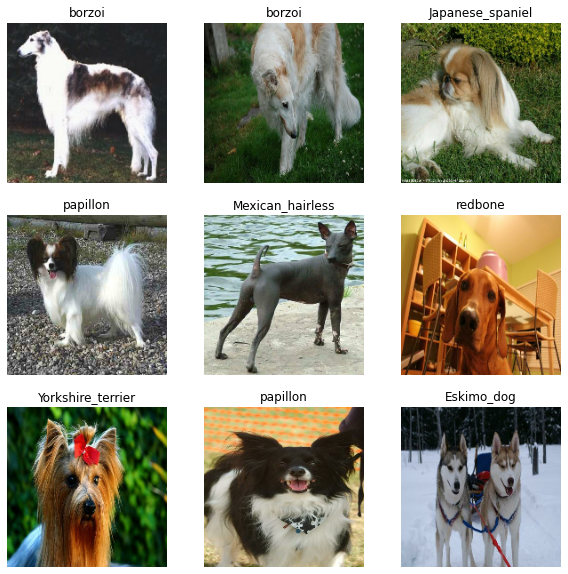

In [14]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")